In [1]:
!pip install tensorflow-gpu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
##feature Engineering

In [18]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [17]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [19]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [22]:
X=X.drop(["Geography","Gender"],axis=1)

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [25]:
X=pd.concat([X,geography,gender],axis=1)

In [26]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
#Splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
## feaature Scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [30]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [31]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [33]:
X_train.shape

(8000, 11)

In [35]:
## create ANN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [36]:
## Initialize ANN
classifier=Sequential()

In [38]:
## Adding the input Layer
classifier.add(Dense(units=11,activation="relu"))

In [75]:
##Adding the first hidden layer
classifier.add(Dense(units=7,activation="relu"))
classifier.add(Dropout(0.2))

In [41]:
##Adding the second hidden layer
classifier.add(Dense(units=6,activation="relu"))
classifier.add(Dropout(0.3))

In [76]:
##Adding the output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [77]:
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [78]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [79]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [80]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.4187 - accuracy: 0.8451 - val_loss: 0.3841 - val_accuracy: 0.8516
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3675 - accuracy: 0.8587 - val_loss: 0.3714 - val_accuracy: 0.8538
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3637 - accuracy: 0.8576 - val_loss: 0.3657 - val_accuracy: 0.8519
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3559 - accuracy: 0.8604 - val_loss: 0.3702 - val_accuracy: 0.8493
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3529 - accuracy: 0.8630 - val_loss: 0.3615 - val_accuracy: 0.8580
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3516 - accuracy: 0.8584 - val_loss: 0.3745 - val_accuracy: 0.8379
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3462 - accuracy: 0.8597 - val_loss: 0.3807 - val_accuracy:

In [81]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

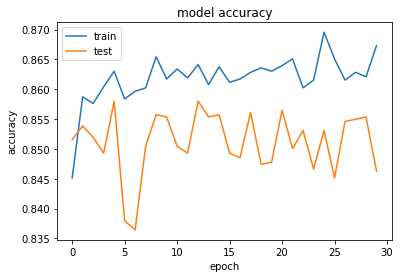

In [82]:
##Summary for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()


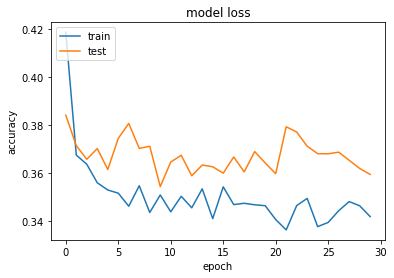

In [83]:
##Summary for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [84]:
##making the prediction and evaluating thge model
#predicting the test set result
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)



In [85]:
## make the confussion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1570,   25],
       [ 271,  134]], dtype=int64)

In [86]:
##calculate the accuracy 
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.852

In [87]:
## get the weights
classifier.get_weights()

[array([[-2.0830505 , -1.2694234 , -0.809005  ,  0.44506735,  1.1691108 ,
         -0.6007904 ,  0.4904988 ,  1.0625676 ,  0.5104773 ,  0.23721865,
          0.09883473],
        [ 1.2251471 , -3.1202402 ,  6.5536137 , -2.5942652 , -0.78517944,
         -5.00128   ,  0.8674457 ,  0.07024693,  1.7393587 ,  4.1595626 ,
          0.11711162],
        [-1.5016747 ,  2.2353194 , -0.29105946, -1.8040769 ,  0.48182172,
          0.17057769,  0.086124  , -0.5466159 ,  0.9760609 , -0.44079766,
          0.36482367],
        [ 1.8424262 , -0.3527852 ,  0.6820565 , -1.4072695 , -4.1024537 ,
         -3.018485  ,  0.0434056 ,  2.6486955 , -6.375009  , -1.1783487 ,
         -6.548864  ],
        [ 1.116128  , -1.1981823 , -2.1960206 , -2.2416189 , -0.90652883,
         -0.10704607,  5.080715  , -1.1321545 ,  0.29273546, -0.13029823,
         -6.5876737 ],
        [ 0.399304  ,  0.94606787, -0.86238736,  1.4134518 ,  0.18435676,
         -1.7903947 , -0.01474206, -2.3894088 ,  0.62851375, -0.4020015